# Topics Covered
-   Erosion
-   Dialation
-   Opening
-   Closing


###### Import required libraries


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

###### get images

In [7]:
def zero_pad(img,k):
    h,w = img.shape
    pad = np.floor(k/2)

    new_h = int(h+2*pad)
    new_w = int(w+2*pad)
    new_img = np.zeros((new_h,new_w))

    for i in range(h):
        for j in range(w):
            new_img[int(i+pad),int(j+pad)] = img[i,j]

    return new_img

(-0.5, 299.5, 299.5, -0.5)

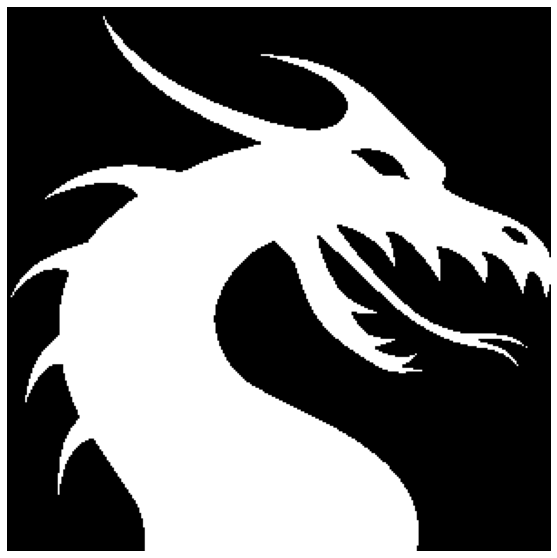

In [8]:
img = cv2.imread("../images/dragon.png",0)
img = np.where(img>250,1,0)

plt.figure(figsize=(10,10))
plt.imshow(img,cmap = 'gray')
plt.axis('off')

###### Erosion and Dialation


In [9]:
#erosion
def erosion(img,k):
    h,w = img.shape
    f_img = np.empty((h,w),dtype=np.uint8)
    pad = int(np.floor(k/2))
    img = zero_pad(img,k)

    for i in range(pad , h+pad):
        for j in range(pad, w+pad):
            f_img[i-pad,j-pad] = np.min(img[i-pad:i+pad+1,j-pad:j+pad+1])#write code #set to zero

    return f_img

In [10]:
#dialation
def dialation(img,k):
    h,w = img.shape
    f_img = np.empty((h,w),dtype=np.uint8)
    pad = int(np.floor(k/2))
    img = zero_pad(img,k)

    for i in range(pad , h+pad):
        for j in range(pad, w+pad):
            f_img[i-pad,j-pad] = np.max((img[i-pad:i+pad+1,j-pad:j+pad+1])) #write code #set to 1

    return f_img

In [11]:
k = 5
e_img = erosion(img,k)
d_img = dialation(img,k)

(-0.5, 299.5, 299.5, -0.5)

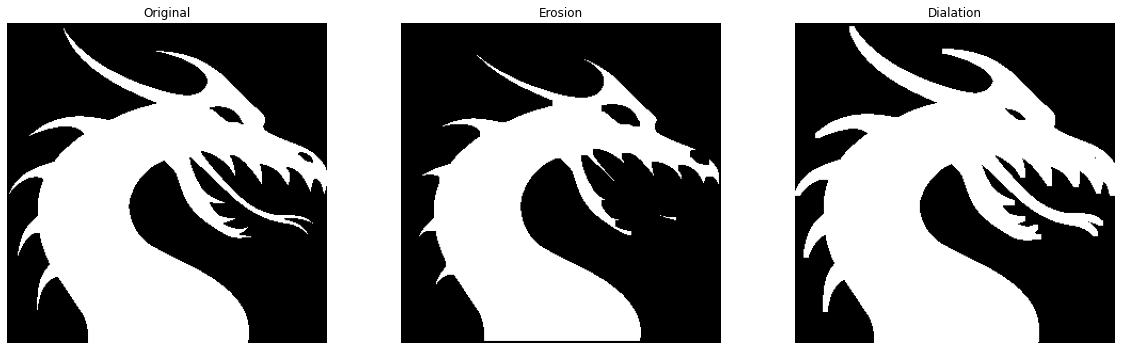

In [12]:
fig = plt.figure(figsize=(20,20))


ax = fig.add_subplot(3,3,1)
ax.imshow(img,cmap='gray')
ax.set_title("Original")
ax.axis('off')

ax = fig.add_subplot(3,3,2)
ax.imshow(e_img,cmap='gray')
ax.set_title("Erosion")
ax.axis('off')


ax = fig.add_subplot(3,3,3)
ax.imshow(d_img,cmap='gray')
ax.set_title("Dialation")
ax.axis('off')


#### Opening

(-0.5, 511.5, 511.5, -0.5)

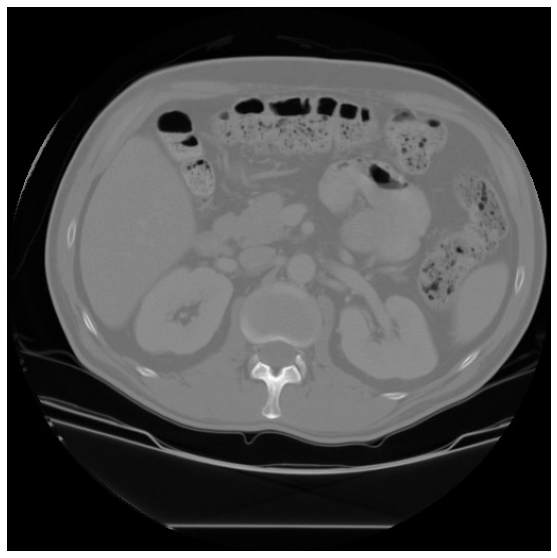

In [19]:
img = cv2.imread("../images/kidney.jpg",0)

plt.figure(figsize=(10,10))
plt.imshow(img,cmap = 'gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

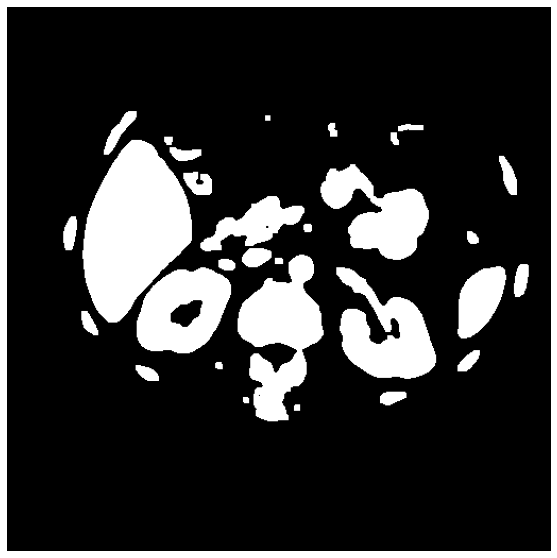

In [20]:
k=5

blur = cv2.GaussianBlur(img,(11,11),0)
img = np.where(blur>130,1,0)


img = erosion(img,k)
img = dialation(img,k )

plt.figure(figsize=(10,10))
plt.imshow(img,cmap = 'gray')
plt.axis('off')

#### Closing

(-0.5, 443.5, 772.5, -0.5)

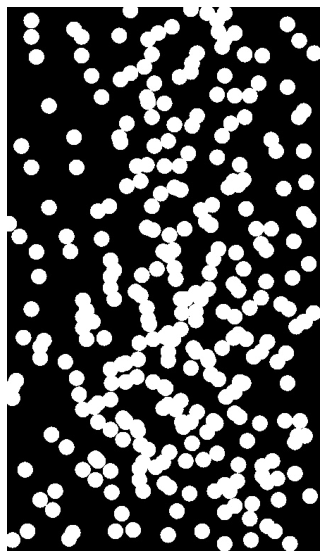

In [15]:
img = cv2.imread("../images/coins.jpg",0)

plt.figure(figsize=(10,10))
plt.imshow(img,cmap = 'gray')
plt.axis('off')

(-0.5, 443.5, 772.5, -0.5)

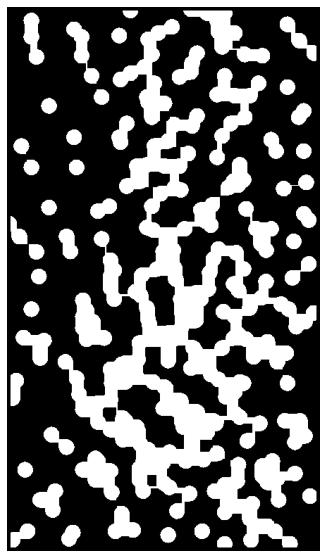

In [17]:
k=11

img = np.where(img>130,1,0)

img = dialation(img,k )

img = erosion(img,k)
#perform closing operation

plt.figure(figsize=(10,10))
plt.imshow(img,cmap = 'gray')
plt.axis('off')